# Projeto - Análise Temporal e Detecção de Anomalias

#### Instalação das Bibliotecas

In [27]:
!pip install pandas matplotlib numpy seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Carregando o dataset do repositório no GitHub

In [29]:
# URL do arquivo CSV no GitHub
url = 'vendas_kbelo.csv'

# Carregar o dataset para um dataframe
df = pd.read_csv(url)

Visualizando as primeiras linhas do dataframe

In [30]:
df.head()

,ID da Transacao,Item,Quantidade,Valor Unitario,Total do Pedido,Forma de Pagamento,Local,Data da Transacao
0,TXN_1961373,PastelDoce,2,12.0,24.0,Credito,Viagem,2023-09-08
1,TXN_4977031,PastelSalgado,4,13.5,54.0,Dinheiro,NoLocal,2023-05-16
2,TXN_4271903,Batata,4,10.0,NaN,Credito,NoLocal,2023-07-19
3,TXN_7034554,DogCompleto,2,15.0,30.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,PastelDoce,2,12.0,24.0,Pix,NoLocal,2023-06-11


Logo na visualização dos primeiros itens do dataset já notamos que algumas colunas apresentam valores inesperados (ERROR, UNKNOWN) ou faltantes...

Vamos explorar melhor esse dataset para entender com que tipos de problemas estaremos lidando.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID da Transacao     10200 non-null  object
 1   Item                9857 non-null   object
 2   Quantidade          10059 non-null  object
 3   Valor Unitario      9681 non-null   object
 4   Total do Pedido     9722 non-null   object
 5   Forma de Pagamento  7564 non-null   object
 6   Local               6870 non-null   object
 7   Data da Transacao   10034 non-null  object
dtypes: object(8)
memory usage: 637.6+ KB


A primeira coisa que notamos é que todas as colunas estão com o tipo "object", até mesmo as colunas que deveriam ser numéricas como Quantidade, Valor Unitario, Total do Pedido.

Para entender os tipos de valores que estão ocorrendo em cada uma das colunas, vamos utilizar do método .value_counts()

In [32]:
for col in df.columns:
  print(f"Value counts para a coluna '{col}':")
  value_counts = df[col].value_counts()
  display(value_counts)
  print("\n")

Value counts para a coluna 'ID da Transacao':


ID da Transacao
TXN_2453194    2
TXN_7519611    2
TXN_9814511    2
TXN_7864080    2
TXN_9018535    2
              ..
TXN_9610933    1
TXN_7440879    1
TXN_4228312    1
TXN_6431703    1
TXN_2832778    1
Name: count, Length: 10000, dtype: int64



Value counts para a coluna 'Item':


Item
Suco             1196
PastelDoce       1181
DogCompleto      1175
PastelSalgado    1161
DogSimples       1156
Refrigerante     1118
Batata           1114
Hamburguer       1107
UNKNOWN           351
ERROR             298
Name: count, dtype: int64



Value counts para a coluna 'Quantidade':


Quantidade
5          2051
2          2011
4          1907
3          1883
1          1863
UNKNOWN     173
ERROR       171
Name: count, dtype: int64



Value counts para a coluna 'Valor Unitario':


Valor Unitario
12.0       2214
9.0        1118
15.0       1104
13.5       1052
8.0        1023
1.5        1018
10.0       1013
ERROR       257
UNKNOWN     253
4.0          93
3.0          89
5.0          62
6.0          55
20.0         50
2.0          42
1.0          39
16.0         36
24.0         35
18.0         30
7.5          30
4.5          27
25.0         24
30.0         17
Name: count, dtype: int64



Value counts para a coluna 'Total do Pedido':


Total do Pedido
60.0       718
36.0       682
24.0       640
12.0       481
27.0       468
40.0       438
45.0       422
30.0       421
48.0       420
20.0       281
UNKNOWN    262
15.0       261
18.0       260
3.0        251
75.0       250
ERROR      248
9.0        237
6.0        236
67.5       231
10.0       230
7.5        227
16.0       225
8.0        219
32.0       214
13.5       210
50.0       210
54.0       208
4.5        207
40.5       190
1.5        184
4.0         25
2.0         21
5.0         17
72.0        15
80.0        15
100.0       15
22.5        12
1.0         11
90.0        11
25.0        10
120.0       10
64.0         8
150.0        6
96.0         6
125.0        5
37.5         4
Name: count, dtype: int64



Value counts para a coluna 'Forma de Pagamento':


Forma de Pagamento
Credito     2330
Pix         2327
Dinheiro    2300
ERROR        310
UNKNOWN      297
Name: count, dtype: int64



Value counts para a coluna 'Local':


Local
NoLocal    3081
Viagem     3078
ERROR       363
UNKNOWN     348
Name: count, dtype: int64



Value counts para a coluna 'Data da Transacao':


Data da Transacao
UNKNOWN       163
ERROR         142
2023-03-13     42
2023-06-16     41
2023-02-06     41
             ... 
2023-07-22     15
2023-11-24     15
2023-07-30     15
2023-03-11     14
2023-02-17     14
Name: count, Length: 367, dtype: int64

Com base nas tabelas, podemos ver que existem colunas com valores nulos e tipos de dados com ruído como 'ERROR' ou 'UNKNOWN'.

Vamos tratar esses erros, padronizando todos esses casos de ruído para um valor nulo

In [33]:
df.replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)

Valores nulos por coluna:


ID da Transacao          0
Item                   992
Quantidade             485
Valor Unitario        1029
Total do Pedido        988
Forma de Pagamento    3243
Local                 4041
Data da Transacao      471
dtype: int64

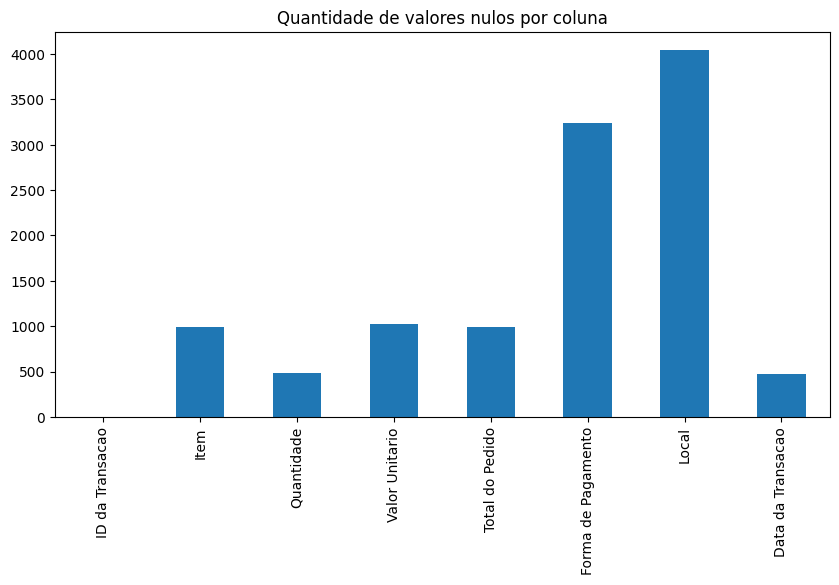

In [34]:
# vamos contar novamente quantos valore nulos existem em cada coluna
print("Valores nulos por coluna:")
display(df.isnull().sum())


plt.figure(figsize=(10, 5))
df.isnull().sum().plot(kind='bar')
plt.title('Quantidade de valores nulos por coluna')
plt.show()

Agora que padronizamos os casos de 'ERROR' e 'UNKNOWN' como valores faltantes, podemos ajustar o tipo das colunas:

In [35]:
df['Quantidade'] = pd.to_numeric(df['Quantidade'])
df['Valor Unitario'] = pd.to_numeric(df['Valor Unitario'])
df['Total do Pedido'] = pd.to_numeric(df['Total do Pedido'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID da Transacao     10200 non-null  object 
 1   Item                9208 non-null   object 
 2   Quantidade          9715 non-null   float64
 3   Valor Unitario      9171 non-null   float64
 4   Total do Pedido     9212 non-null   float64
 5   Forma de Pagamento  6957 non-null   object 
 6   Local               6159 non-null   object 
 7   Data da Transacao   9729 non-null   object 
dtypes: float64(3), object(5)
memory usage: 637.6+ KB


In [36]:
df.head()

,ID da Transacao,Item,Quantidade,Valor Unitario,Total do Pedido,Forma de Pagamento,Local,Data da Transacao
0,TXN_1961373,PastelDoce,2.0,12.0,24.0,Credito,Viagem,2023-09-08
1,TXN_4977031,PastelSalgado,4.0,13.5,54.0,Dinheiro,NoLocal,2023-05-16
2,TXN_4271903,Batata,4.0,10.0,NaN,Credito,NoLocal,2023-07-19
3,TXN_7034554,DogCompleto,2.0,15.0,30.0,NaN,NaN,2023-04-27
4,TXN_3160411,PastelDoce,2.0,12.0,24.0,Pix,NoLocal,2023-06-11


Itens disponíveis: ['PastelDoce' 'PastelSalgado' 'Batata' 'Refrigerante' 'DogSimples'
 'DogCompleto' 'Suco' 'Hamburguer']
Formas de Pagamento disponíveis: ['Credito' 'Dinheiro' 'Pix']
Matriz de confusão (Item x Forma de Pagamento):
Forma de Pagamento  Credito  Dinheiro  Pix
Item                                      
Batata                  257       252  270
DogCompleto             291       292  241
DogSimples              264       257  258
Hamburguer              236       246  257
PastelDoce              245       248  270
PastelSalgado           257       282  249
Refrigerante            259       240  260
Suco                    281       269  291


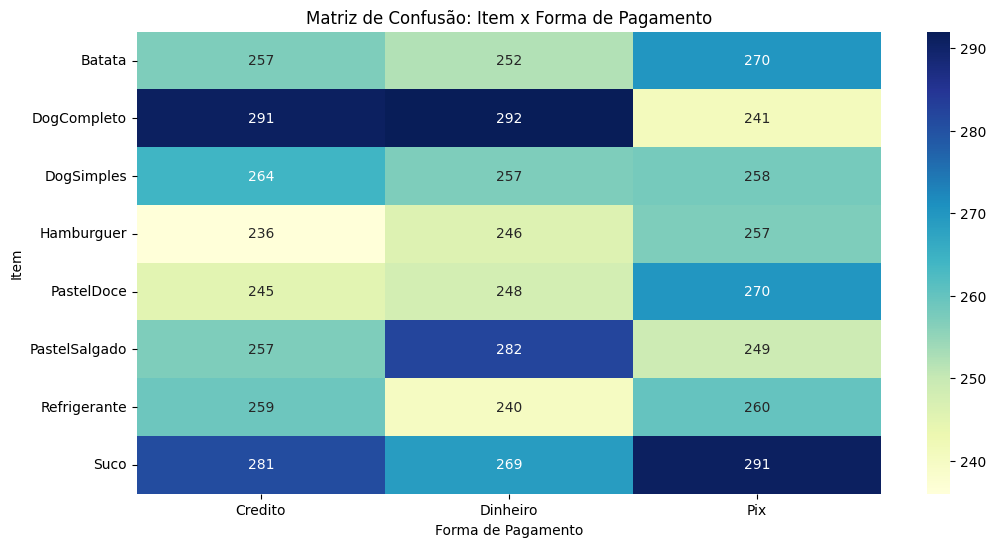

In [37]:
# Matriz de confusão robusta: Item x Forma de Pagamento

# 1. Remover valores nulos e ruídos das colunas relevantes
df_confusao = df.copy()
df_confusao.replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)
df_confusao = df_confusao.dropna(subset=['Item', 'Forma de Pagamento'])

# 2. Conferir as categorias únicas
print("Itens disponíveis:", df_confusao['Item'].unique())
print("Formas de Pagamento disponíveis:", df_confusao['Forma de Pagamento'].unique())

# 3. Gerar a matriz de confusão (tabela cruzada)
matriz_confusao = pd.crosstab(df_confusao['Item'], df_confusao['Forma de Pagamento'])

print("Matriz de confusão (Item x Forma de Pagamento):")
print(matriz_confusao)

# 4. Visualizar a matriz de confusão com heatmap
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Matriz de Confusão: Item x Forma de Pagamento')
plt.ylabel('Item')
plt.xlabel('Forma de Pagamento')
plt.show()

# 5. Dica de análise:
# - Linhas: cada tipo de produto vendido
# - Colunas: cada forma de pagamento utilizada
# - Os valores mostram quantas vezes cada produto foi vendido em cada forma de pagamento
# - Use para identificar padrões de preferência de pagamento por produto

In [38]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()
df['Data da Transacao'] = pd.to_datetime(df['Data da Transacao'])

['ID da Transacao', 'Item', 'Quantidade', 'Valor Unitario', 'Total do Pedido', 'Forma de Pagamento', 'Local', 'Data da Transacao']


In [39]:
# Remover linhas onde o Total do Pedido está faltando
df_temp = df.dropna(subset=['Total do Pedido', 'Data da Transacao'])

# Agrupar por mês
df_temp['AnoMes'] = df_temp['Data da Transacao'].dt.to_period('M')
faturamento_mensal = df_temp.groupby('AnoMes')['Total do Pedido'].sum()

/tmp/ipykernel_17956/3692104536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['AnoMes'] = df_temp['Data da Transacao'].dt.to_period('M')


/tmp/ipykernel_17956/4282753808.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['AnoMes'] = df_temp['Data da Transacao'].dt.to_period('M')


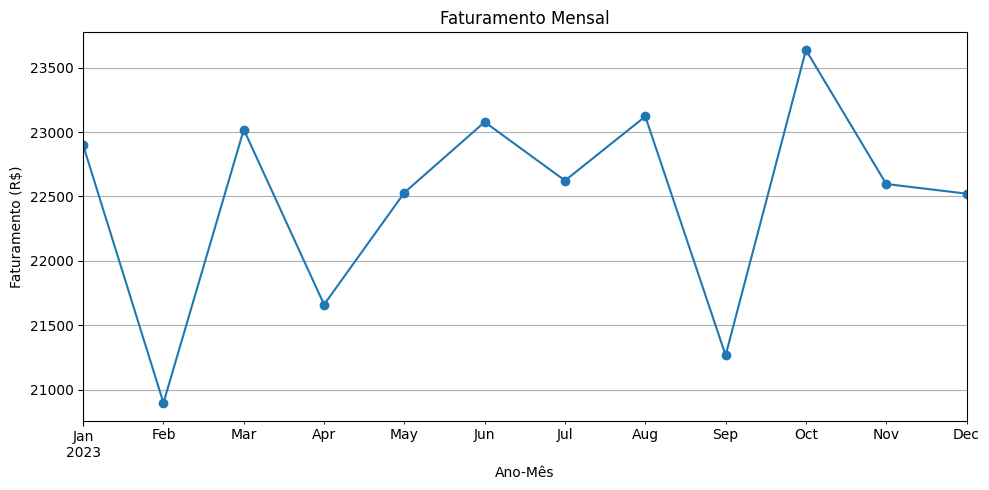

/tmp/ipykernel_17956/4282753808.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['AnoSemana'] = df_temp['Data da Transacao'].dt.to_period('W')


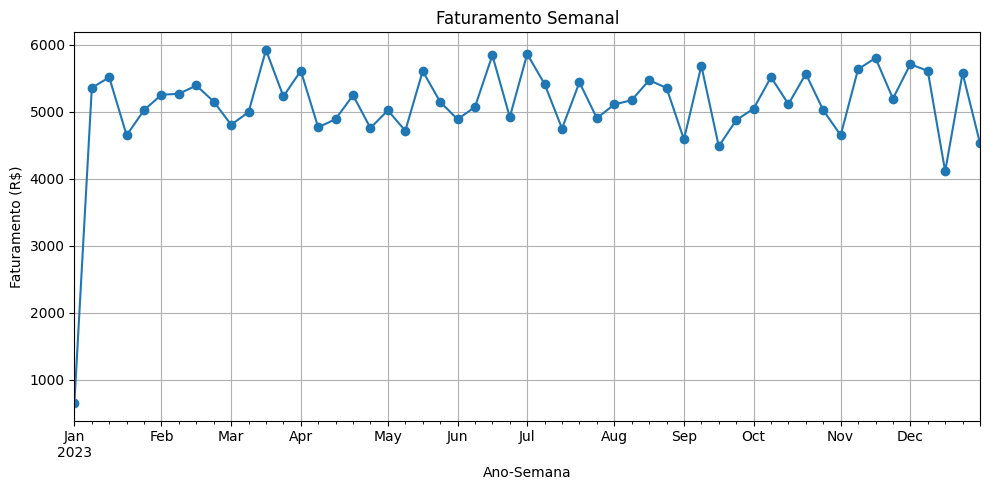

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna de data
df['Data da Transacao'] = pd.to_datetime(df['Data da Transacao'])

# Remover linhas sem valor de pedido
df_temp = df.dropna(subset=['Total do Pedido', 'Data da Transacao'])

# Agrupar por mês
df_temp['AnoMes'] = df_temp['Data da Transacao'].dt.to_period('M')
faturamento_mensal = df_temp.groupby('AnoMes')['Total do Pedido'].sum()

# Plotar
plt.figure(figsize=(10,5))
faturamento_mensal.plot(marker='o')
plt.title('Faturamento Mensal')
plt.xlabel('Ano-Mês')
plt.ylabel('Faturamento (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Converter a coluna de data
df['Data da Transacao'] = pd.to_datetime(df['Data da Transacao'])

# Remover linhas sem valor de pedido
df_temp = df.dropna(subset=['Total do Pedido', 'Data da Transacao'])

# Agrupar por semana
df_temp['AnoSemana'] = df_temp['Data da Transacao'].dt.to_period('W')
faturamento_semanal = df_temp.groupby('AnoSemana')['Total do Pedido'].sum()

# Plotar
plt.figure(figsize=(10,5))
faturamento_semanal.plot(marker='o')
plt.title('Faturamento Semanal')
plt.xlabel('Ano-Semana')
plt.ylabel('Faturamento (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Análise:
O gráfico mostra uma série temporal estável, sem tendência, sazonalidade ou ciclicidade marcantes. As variações semanais podem estar relacionadas a fatores pontuais, mas não a padrões temporais claros.

/tmp/ipykernel_17956/3414721408.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['AnoMes'] = df_temp['Data da Transacao'].dt.to_period('M')


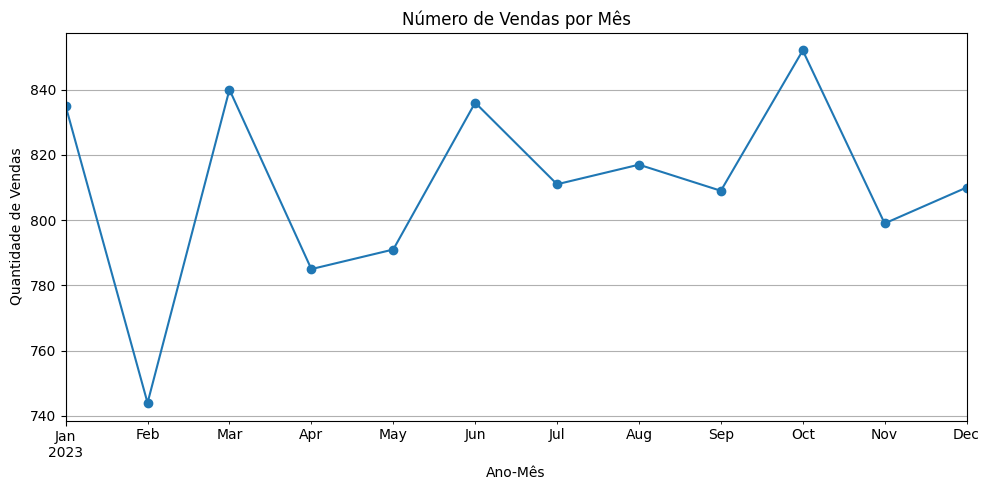

In [41]:
# Número de vendas por mês

# Garantir que a coluna de data está no formato datetime
df['Data da Transacao'] = pd.to_datetime(df['Data da Transacao'])

# Remover linhas sem data
df_temp = df.dropna(subset=['Data da Transacao'])

# Criar coluna de ano-mês
df_temp['AnoMes'] = df_temp['Data da Transacao'].dt.to_period('M')

# Contar o número de vendas (linhas) por mês
vendas_mensais = df_temp.groupby('AnoMes').size()

# Plotar
plt.figure(figsize=(10,5))
vendas_mensais.plot(marker='o')
plt.title('Número de Vendas por Mês')
plt.xlabel('Ano-Mês')
plt.ylabel('Quantidade de Vendas')
plt.grid(True)
plt.tight_layout()
plt.show()

Mensal não bastou para ter uma visualização boa, irei tentar semanal!

/tmp/ipykernel_17956/1155230568.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['AnoSemana'] = df_temp['Data da Transacao'].dt.to_period('W')


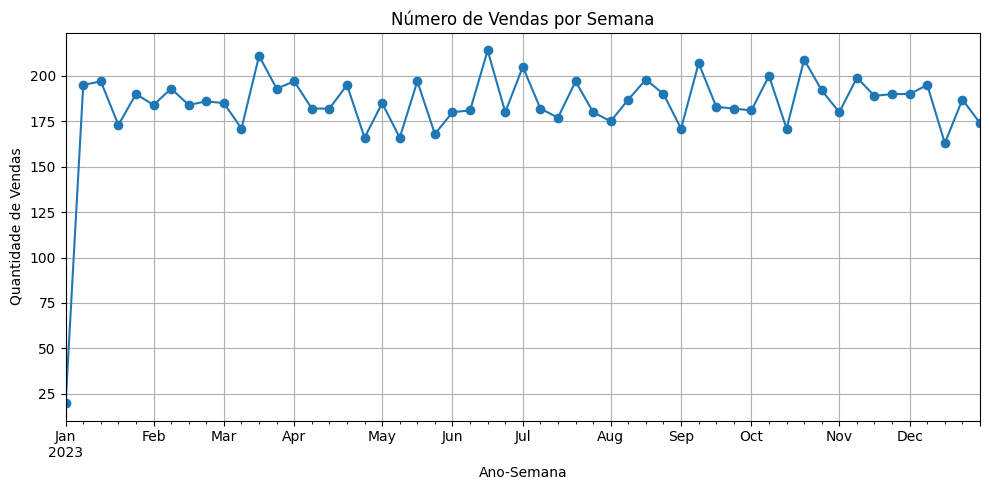

In [42]:
# Número de vendas por semana

# Garantir que a coluna de data está no formato datetime
df['Data da Transacao'] = pd.to_datetime(df['Data da Transacao'])

# Remover linhas sem data
df_temp = df.dropna(subset=['Data da Transacao'])

# Criar coluna de ano-semana
df_temp['AnoSemana'] = df_temp['Data da Transacao'].dt.to_period('W')

# Contar o número de vendas (linhas) por semana
vendas_semanais = df_temp.groupby('AnoSemana').size()

# Plotar
plt.figure(figsize=(10,5))
vendas_semanais.plot(marker='o')
plt.title('Número de Vendas por Semana')
plt.xlabel('Ano-Semana')
plt.ylabel('Quantidade de Vendas')
plt.grid(True)
plt.tight_layout()
plt.show()

## Análise:

Tendência: Não há tendência clara.
Sazonalidade: Possível sazonalidade fraca em alguns períodos do ano, entre apr - may e sep - oct tem uma semelhança, assim como
entre feb -mar e nov - dec tem uma semelhança.
Ciclicidade: Não há ciclos longos evidentes.
Variação: Oscilações semanais pequenas, com padrão estável.
Se quiser aprofundar a análise, pode calcular médias móveis ou decompor a série temporal para visualizar melhor esses componentes!

# Detecção de Anomalias!

In [43]:
# Carregar o dataset
df = pd.read_csv('vendas_kbelo.csv')

# Converter colunas numéricas
df['Quantidade'] = pd.to_numeric(df['Quantidade'], errors='coerce')
df['Valor Unitario'] = pd.to_numeric(df['Valor Unitario'], errors='coerce')
df['Total do Pedido'] = pd.to_numeric(df['Total do Pedido'], errors='coerce')

# Remover linhas com NaN nas colunas de interesse
df_clean = df.dropna(subset=['Quantidade', 'Valor Unitario', 'Total do Pedido'])

In [44]:
from scipy.stats import zscore

# Calcular z-score para as colunas numéricas
df_clean['zscore_total'] = zscore(df_clean['Total do Pedido'])

# Identificar anomalias
anomalias_zscore = df_clean[abs(df_clean['zscore_total']) > 3]
print(anomalias_zscore)

     ID da Transacao     Item  Quantidade  Valor Unitario  Total do Pedido  \
52       TXN_8914892  UNKNOWN         5.0            25.0            125.0   
165      TXN_3226832  UNKNOWN         5.0            20.0            100.0   
216      TXN_3499124    ERROR         4.0            24.0             96.0   
799      TXN_8776606  UNKNOWN         4.0            30.0            120.0   
984      TXN_1646009    ERROR         4.0            25.0            100.0   
1055     TXN_1413304  UNKNOWN         5.0            20.0            100.0   
2016     TXN_6641409  UNKNOWN         5.0            24.0            120.0   
2198     TXN_5406758    ERROR         5.0            30.0            150.0   
2222     TXN_7943598  UNKNOWN         4.0            24.0             96.0   
2287     TXN_4099487    ERROR         5.0            20.0            100.0   
2578     TXN_8724474    ERROR         5.0            30.0            150.0   
2629     TXN_3485938  UNKNOWN         4.0            30.0       

/tmp/ipykernel_17956/2049872112.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['zscore_total'] = zscore(df_clean['Total do Pedido'])


## Analise - Z-score
O Z-score identificou corretamente os pontos fora do padrão esperado para o valor total dos pedidos. A análise dos registros anômalos sugere que muitos deles estão associados a problemas de cadastro ou vendas incomuns, reforçando a importância de sempre inspecionar os dados antes de tomar decisões baseadas apenas em métodos automáticos.

In [45]:
Q1 = df_clean['Total do Pedido'].quantile(0.25)
Q3 = df_clean['Total do Pedido'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

anomalias_iqr = df_clean[(df_clean['Total do Pedido'] < limite_inferior) | (df_clean['Total do Pedido'] > limite_superior)]
print(anomalias_iqr)

     ID da Transacao     Item  Quantidade  Valor Unitario  Total do Pedido  \
52       TXN_8914892  UNKNOWN         5.0            25.0            125.0   
165      TXN_3226832  UNKNOWN         5.0            20.0            100.0   
216      TXN_3499124    ERROR         4.0            24.0             96.0   
799      TXN_8776606  UNKNOWN         4.0            30.0            120.0   
984      TXN_1646009    ERROR         4.0            25.0            100.0   
1055     TXN_1413304  UNKNOWN         5.0            20.0            100.0   
2016     TXN_6641409  UNKNOWN         5.0            24.0            120.0   
2198     TXN_5406758    ERROR         5.0            30.0            150.0   
2222     TXN_7943598  UNKNOWN         4.0            24.0             96.0   
2287     TXN_4099487    ERROR         5.0            20.0            100.0   
2578     TXN_8724474    ERROR         5.0            30.0            150.0   
2629     TXN_3485938  UNKNOWN         4.0            30.0       

## Analise - IQR
O IQR identificou corretamente os outliers superiores em Total do Pedido, reforçando o padrão observado pelo Z-score. A maioria das anomalias está associada a valores altos e a possíveis problemas de cadastro, mostrando a importância de combinar métodos estatísticos com análise de contexto dos dados.

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Selecionar features numéricas
X = df_clean[['Quantidade', 'Valor Unitario', 'Total do Pedido']]

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Anomalias são os pontos com label -1
df_clean['dbscan_label'] = labels
anomalias_dbscan = df_clean[df_clean['dbscan_label'] == -1]
print(anomalias_dbscan)

Empty DataFrame
Columns: [ID da Transacao, Item, Quantidade, Valor Unitario, Total do Pedido, Forma de Pagamento, Local, Data da Transacao, zscore_total, dbscan_label]
Index: []


/tmp/ipykernel_17956/4004394973.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['dbscan_label'] = labels


Não consegui fazer funcionar bem :(

In [47]:
from sklearn.ensemble import IsolationForest

# Aplicar Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_clean['anomaly_iforest'] = iso_forest.fit_predict(X_scaled)

# Anomalias são os pontos com valor -1
anomalias_iforest = df_clean[df_clean['anomaly_iforest'] == -1]
print(anomalias_iforest)

      ID da Transacao     Item  Quantidade  Valor Unitario  Total do Pedido  \
8         TXN_4717867      NaN         5.0             3.0             15.0   
30        TXN_1736287      NaN         5.0             2.0             10.0   
33        TXN_7710508  UNKNOWN         5.0             5.0             25.0   
52        TXN_8914892  UNKNOWN         5.0            25.0            125.0   
61        TXN_8051289      NaN         1.0             3.0              3.0   
...               ...      ...         ...             ...              ...   
10074     TXN_3324387  UNKNOWN         1.0            20.0             20.0   
10088     TXN_3105633      NaN         1.0             2.0              2.0   
10090     TXN_7519611  UNKNOWN         4.0             4.5             18.0   
10106     TXN_4011694      NaN         1.0             2.0              2.0   
10190     TXN_2798069    ERROR         5.0             6.0             30.0   

      Forma de Pagamento    Local Data da Transacao

/tmp/ipykernel_17956/3878733376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['anomaly_iforest'] = iso_forest.fit_predict(X_scaled)


O número de anomalias é relativamente alto (aproximadamente 5% do dataset, conforme o parâmetro contamination=0.05).
Ele encontrou tanto valores muito altos quanto muito baixos, além de possíveis combinações incomuns entre as variáveis.

# Analise - Isolation Forest

O Isolation Forest identificou uma quantidade significativa de anomalias, incluindo registros com valores extremos e problemas de preenchimento.